
# Project: MOVIE DATA ANALYSIS - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data set selected for this project contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset has a total number of 21 columns and 10866 rows. Each row represented a movie entry and the  columns contains specific information about the movie. Columns like revenue and budget contain information about the budget and revenue spent to make the movie. Column 'Cast' contains the names of the cast members for each movie and it contains multiple values separated by pipe (|) characters. 
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
Questions to be asked --

* Which movies had the highest and lowest profit, what decade of movies had the highest profit?
* Which movie genres were least successful in terms of  profit?


In [28]:
##Importing packages needed for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
pd.set_option('display.max_rows', 500)


In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling
This section will be focus on loading the data set and reviewing the available date. Also captured in this section is the data cleaning process in preparation for exploration.


In [29]:
#load  and  display data
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Print list of columns in the data
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [61]:
#show data description 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [3]:
## get data structure information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Note:
From the above 4 operations, we now have a clear view of the data available to us. After loading the data, we searched out the first few rows of the data to see how it looks like. Displayed next are all the 21 data columns. The next two actions were to get more information about the data structure and some early analytical results. 


### Data Cleaning
From step 4 in the data wrangling section, we can already see that our data needs cleaning. Captured in this section are the steps taken to clean the data and they are highlighted below :-
1. Remove unwanted colums - Remove columns that will not be used in the analysis process.
2. Duplicate check and removal - Check for and remove duplicate data entry
3. Remove rows with null or zero information 
4. Convert columns datatypes to correct format.

In [3]:
##drop unwanted columns
columns_drop = ['homepage', 'production_companies', 'tagline', 'keywords','imdb_id','director','overview']
df.drop(columns_drop, axis = 1, inplace = True)


In [6]:
#get data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [4]:
##Duplicate check and removal
duplicate_no = sum(df.duplicated())
print ('Total duplicates found = '+ str(duplicate_no))

Total duplicates found = 1


In [5]:
## Drop duplicate columns
df.drop_duplicates(inplace=True)
print(str(duplicate_no) + ' duplicate column(s) dropped.')

1 duplicate column(s) dropped.


From above get info, genres is the only column left with null values, so we'll drop those rows.

In [9]:
#drop null values
df[df.genres.isnull()]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 14 columns):
id                10767 non-null int64
popularity        10767 non-null float64
budget            10767 non-null int64
revenue           10767 non-null int64
original_title    10767 non-null object
cast              10767 non-null object
runtime           10767 non-null int64
genres            10767 non-null object
release_date      10767 non-null object
vote_count        10767 non-null int64
vote_average      10767 non-null float64
release_year      10767 non-null int64
budget_adj        10767 non-null float64
revenue_adj       10767 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [6]:
#Check the budget and revenue columns for zeros as movies should not have zero budget or revenue

# Columns to be checked for zero values.
columns = ['budget', 'revenue', 'budget_adj', 'revenue']

# Replace zero  with null
df[columns] = df[columns].replace(0, np.NaN)

# Drop rows which contains null
df.dropna(subset = columns, inplace = True)


In [8]:
#Convert release date from datatype object to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#Display cleaned data information.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 14 columns):
id                3850 non-null int64
popularity        3850 non-null float64
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null datetime64[ns]
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(3)
memory usage: 451.2+ KB
None


<a id='eda'></a>
## Exploratory Data Analysis

In this section, we'll try to find answers about the questions asked with this dataset.


### Question 1. Which movies had the highest and lowest profit, what decade of movies had the highest profit?

To answer research question 1, we first have to know the profit for each movie. To do this, a new column called 'Movie_profit'  will be added after the revenue column. This new column will contain the difference between the revenue and the budget.

In [32]:
#Create new column 'Movie_profit' with insert function.

df.insert(4,'Movie_profit',df['revenue']- df['budget'])

#preview new data
df.head()

,id,imdb_id,popularity,budget,Movie_profit,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1316249360,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To find the movies with the highest and lowest profit.

In [33]:
# Movie with highest profit
max_profit = df.iloc[df['Movie_profit'].idxmax()]
print (max_profit)

id                                                                  19995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                          237000000
Movie_profit                                                   2544505847
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                               

In [34]:
# Movie with lowest profit
min_profit = df.iloc[df['Movie_profit'].idxmin()]
print(min_profit)

id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                          425000000
Movie_profit                                                   -413912431
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                               

Visualizing the distribution of profit, and budget using a box plot

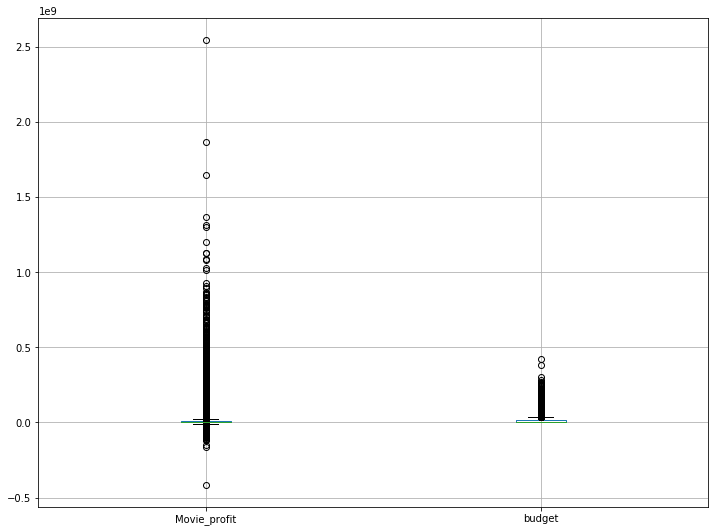

In [36]:
#plot
box_image = df.boxplot(column=['Movie_profit', 'budget'])

#define dimensions
box_image.figure.set_size_inches(12, 9)

#display plot
plt.show()

Now that we know the movies with both the highest and lowest profit, we can turn attention to knowing the decade that made the most profit.

In [24]:
#Converting release year column to str to get a substring and 0 to get movie decade
df['release_year'] = df['release_year'].apply(str)

#movie decade
df['decade'] =df.release_year.str.slice(0, 3) + '0'

#To show the relationship between decade and profit
decade_profit = df.groupby('decade')['Movie_profit'].sum()

print (decade_profit)

#To show the relationship between decade and profit
decade_budget = df.groupby('decade')['budget'].sum()

print (decade_budget)


decade
1960    2.447471e+09
1970    8.092231e+09
1980    1.887040e+10
1990    4.808861e+10
2000    9.774661e+10
2010    9.639585e+10
Name: Movie_profit, dtype: float64
decade
1960    4.573062e+08
1970    9.798002e+08
1980    5.630069e+09
1990    2.564563e+10
2000    6.304547e+10
2010    4.762477e+10
Name: budget, dtype: float64


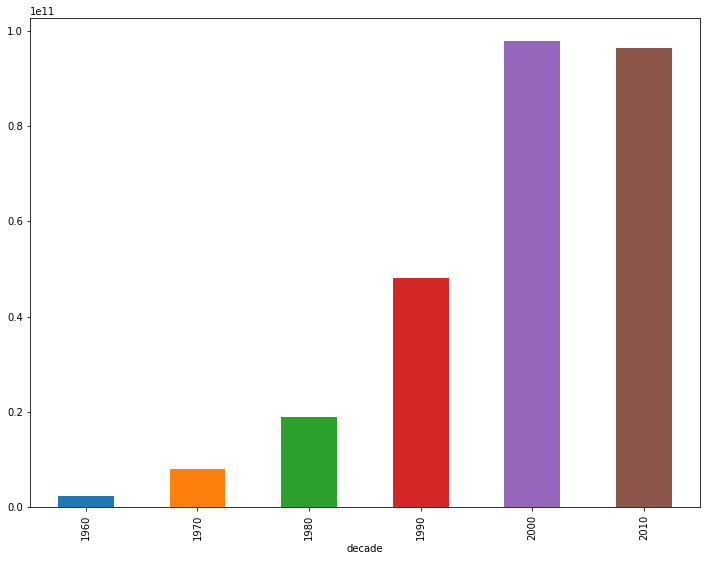

In [116]:
#Visualizing information
image = years_profit.plot.bar()

#figure size(width, height)
image.figure.set_size_inches(12, 9)


From the bar chart above, we can already draw some conclusions about the profitablity of the movie industry. At first, it wasn't so profitable but it experienced a steady increase as the years went by with the occasional dip in profit. A turn of events between the year 2000 and 2010 saw the movie industry experience a profit boom that saw it apprximately double its profit in one-fifth of the time it took to reach its profitability margin with respect to the year 2000. 

### Question 2: Which movie genres were most  successful in terms of  profit?

Here we're trying to find out if the genre of the movies was a factor that affected their profitablity. To do this, we first have to set a benchmark for how much  profit a movie has to have made to be identified as a succesful movie. This mark will be set at 30,000,000.00 in profit. Anything over this would be successful in terms on profit

In [117]:
#Get data of all movies that made 30 million or more in profit 
successful_movie_data = df[df['Movie_profit'] > 30000000]


In [2]:
#Data in column genres are split by seperators before being counted.

# A function that will take any column
def data(column):
    #will take a column, and separate the string by '|'
    data = successful_movie_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in ascending order
    count = data.value_counts()
    
    return count

In [119]:
#variable to store the retured value
count = data('genres')
#printing top 5 least profitable movie genres
most_successful_actors = count.head(10)
print (most_successful_actors)

Drama              634
Comedy             606
Action             546
Thriller           508
Adventure          431
Romance            277
Crime              262
Family             260
Science Fiction    242
Fantasy            223
dtype: int64


From this we can see that movies tagged under genre 'Drama' made the most profit, followed by 'Comedy' and 'Action'. This could be useful in helping a production company deciding which genres of movies to invest in.
For visualization, a graphical analysis of the above collected data is done below.


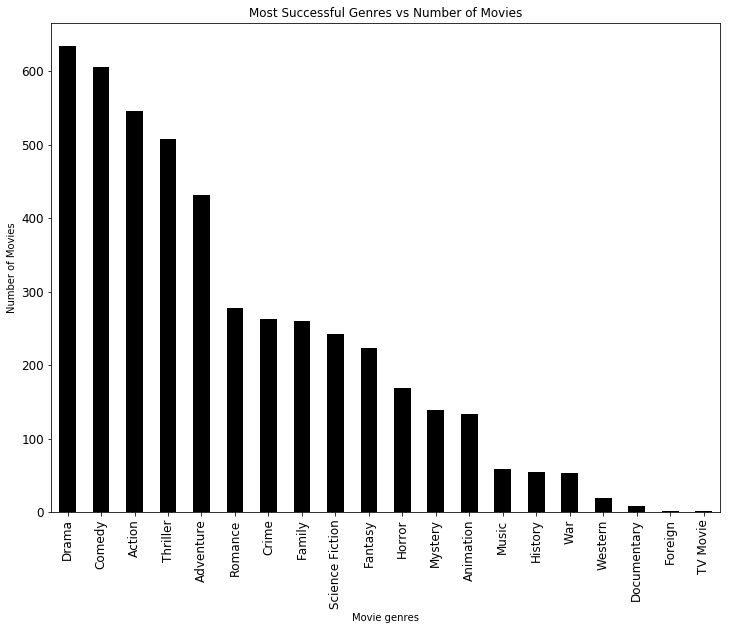

In [120]:
# Initialize the plot
diagram = count.plot.bar(color = 'black', fontsize = 12) 

#figure size(width, height)
diagram.figure.set_size_inches(12, 9)

# Set a title
diagram.set(title = 'Most Successful Genres vs Number of Movies')

# x-label and y-label
diagram.set_xlabel('Movie genres')

diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show()

From the graph above, we can already have an idea why movies tagged with the 'Foreign' genre were the least profitable. The number of movies under this genre is significantly small when compared to that of the 'Drama' genre which so happens to be the most successful. Also, another deduction from the graph is that Drama and Comedy are the most successful genres of movies.

<a id='conclusions'></a>
## Conclusions

1. The movie industry experienced a slow but steady growth from 1960 to 2000 and a boom between the year 2000 and 2015.

2. The year 2015 saw movies make the most profit and the year 1960 saw the least profit from movies. 

3. 'Drama' and 'Comedy' are the two most successful movie genres, while 'Foreign' and 'Documentary' were the least successful

 
 
 ## Possible future analysis.
 
 * Find out the positive or negative difference due to inflation on the movies budget and revenue
 * Find out the rate of inflation over the years.
 
 # Limitations.
  The original data provided was not clean and to enable it be properly anaylysed, it had to be cleaned. This became a limitation because the data cleaning process required a large amount of entries to be removed thereby reducing the volume of dataset to be considered for analysis.
 
 # References.
GitHub - amiratantawy/Project-2----investigate-a-dataset: Udacity data analyst nanodegree -- project 2 investigate a dataset. (2022). Retrieved 5 June 2022, from https://github.com/amiratantawy/Project-2----investigate-a-dataset
 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0